In [1]:
# Importing necessary libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import figure

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer


In [2]:
#reading csv file
df = pd.read_csv("Datasets/pump.csv")
df.head()

,file_name,y_min,y_max,y_mean,y_std,zcr_mean,zcr_min,zcr_max,spec_cent_min,spec_cent_mean,spec_roll_min,spec_roll_mean,rms_mean,flat_mean,flat_max,amp_mean,amp_min,melspec_mean,melspec_std,class
0,0_dB_pump/pump/id_00/normal/00000773.wav,-0.031029,0.027334,-1.024308e-06,0.005068,0.078320,0.034668,0.109863,1165.865143,1490.294723,2121.020508,3082.195748,0.005032,0.000471,0.005602,0.014499,0.008487,0.005801,0.016070,0
1,0_dB_pump/pump/id_00/normal/00000632.wav,-0.023794,0.034021,-1.678013e-07,0.005452,0.076602,0.041016,0.099609,1161.577508,1493.303706,2077.954102,3209.046798,0.005439,0.000531,0.009019,0.015554,0.010189,0.006715,0.016513,0
2,0_dB_pump/pump/id_00/normal/00000238.wav,-0.022709,0.024207,-1.272001e-06,0.005226,0.067668,0.023438,0.102051,1126.586451,1550.010221,2487.084961,3601.990284,0.005210,0.000490,0.006266,0.014665,0.009572,0.006221,0.022148,0
3,0_dB_pump/pump/id_00/normal/00000148.wav,-0.041376,0.036947,-4.455067e-07,0.005865,0.087245,0.034180,0.125488,1280.874679,1687.839809,2659.350586,3628.844337,0.005834,0.000633,0.006443,0.017364,0.009567,0.007527,0.020909,0
4,0_dB_pump/pump/id_00/normal/00000388.wav,-0.022065,0.022523,-6.515116e-07,0.005028,0.083796,0.037109,0.116699,1362.509464,1713.623128,2896.215820,3777.728201,0.004999,0.000673,0.015977,0.014255,0.009090,0.005714,0.018559,0


In [3]:
#creating new dataframe

#Necessary data names
dimentions = ['zcr_mean','spec_cent_mean','rms_mean','melspec_mean','amp_mean']

df = df[dimentions]

df.head()

,zcr_mean,spec_cent_mean,rms_mean,melspec_mean,amp_mean
0,0.078320,1490.294723,0.005032,0.005801,0.014499
1,0.076602,1493.303706,0.005439,0.006715,0.015554
2,0.067668,1550.010221,0.005210,0.006221,0.014665
3,0.087245,1687.839809,0.005834,0.007527,0.017364
4,0.083796,1713.623128,0.004999,0.005714,0.014255


In [4]:
df.rename(columns={'zcr_mean': 'zcr',
                   'spec_cent_mean':'spectral_centroid',
                   'rms_mean': 'rsm',
                   'melspec_mean': 'mel_spectogram',
                   'amp_mean': 'amplitude'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4205 entries, 0 to 4204
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   zcr                4205 non-null   float64
 1   spectral_centroid  4205 non-null   float64
 2   rsm                4205 non-null   float64
 3   mel_spectogram     4205 non-null   float64
 4   amplitude          4205 non-null   float64
dtypes: float64(5)
memory usage: 164.4 KB


In [6]:
df.isnull().sum()

zcr                  0
spectral_centroid    0
rsm                  0
mel_spectogram       0
amplitude            0
dtype: int64

In Pairplor we will check how features are related to each other.

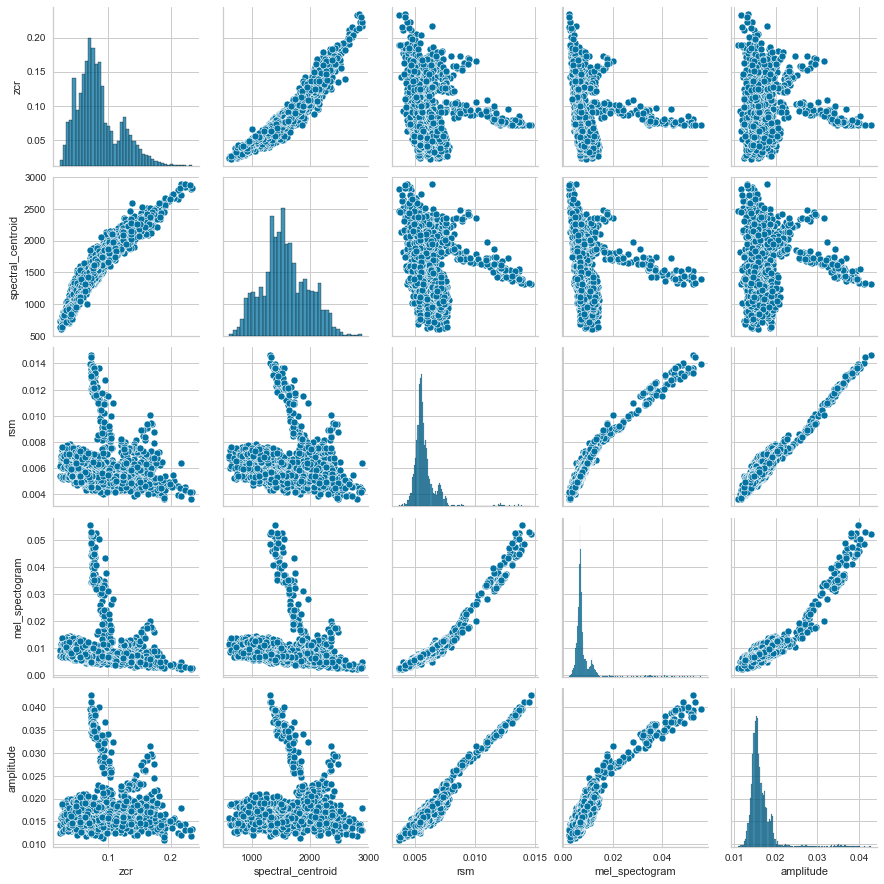

In [9]:
#create a pairplot to dataframe

sns.pairplot(df)

In [10]:
#sns.pairplot(tips,hue='sex')

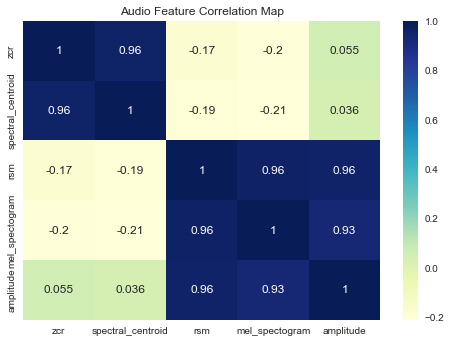

In [11]:
#Creating HeatMap

sns.heatmap(df.corr(),cmap="YlGnBu", annot=True);
plt.title("Audio Feature Correlation Map");

Text(0, 0.5, 'Spectral Centroid')

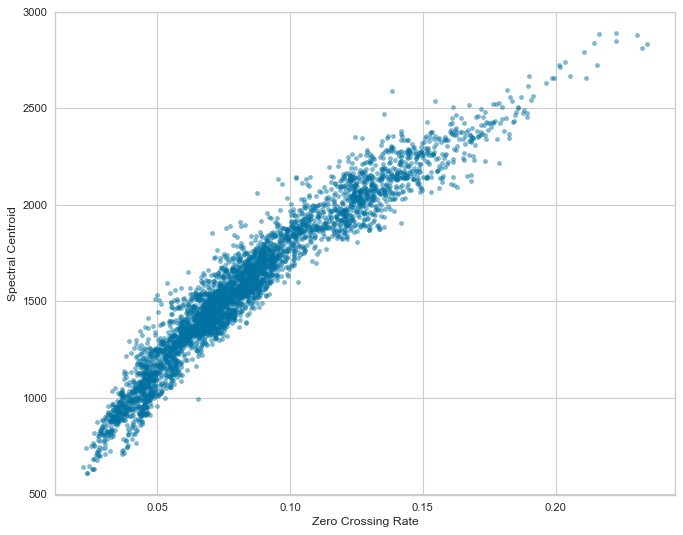

In [12]:
# Let's observe relationships between Zero Crossing Rate and Spectral Centroid
# positive, strong and linear 
figure(figsize=(10, 8), dpi=80)
plt.scatter(df['zcr'], df['spectral_centroid'], s=15, alpha=0.5)
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [13]:
# scaling data
scale = StandardScaler()
StdScale = scale.fit_transform(df)

n_max_clusters = 10

# Elbow Method
wcss = []
for cluster in range(1,n_max_clusters):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(StdScale)
    wcss.append(kmeans.inertia_)

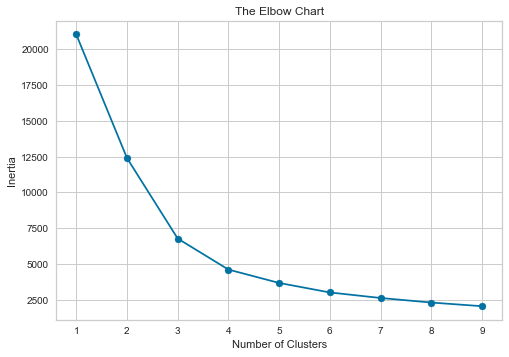

In [14]:
# plotting elbow graphics

plt.plot(range(1,n_max_clusters), wcss)
plt.scatter(range(1,n_max_clusters), wcss)

plt.title('The Elbow Chart')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.show()

In [15]:
k = 3

# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=k, init='k-means++').fit(df)

y_kmeans = kmeans.predict(df)

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
df = df.join(cluster_labels.to_frame())

In [16]:
c0 = (df.cluster == 0).sum()
c1 = (df.cluster == 1).sum()
c2 = (df.cluster == 2).sum()

total = c0 + c1 + c2
print('Total number of data ', total)
print('Percentage of cluster 0 ', c0/total)
print('Percentage of cluster 1 ', c1/total)
print('Percentage of cluster 2 ', c2/total)

Total number of data  4205
Percentage of cluster 0  0.2689655172413793
Percentage of cluster 1  0.2192627824019025
Percentage of cluster 2  0.5117717003567182


In [17]:
df.head()

,zcr,spectral_centroid,rsm,mel_spectogram,amplitude,cluster
0,0.078320,1490.294723,0.005032,0.005801,0.014499,2
1,0.076602,1493.303706,0.005439,0.006715,0.015554,2
2,0.067668,1550.010221,0.005210,0.006221,0.014665,2
3,0.087245,1687.839809,0.005834,0.007527,0.017364,2
4,0.083796,1713.623128,0.004999,0.005714,0.014255,2


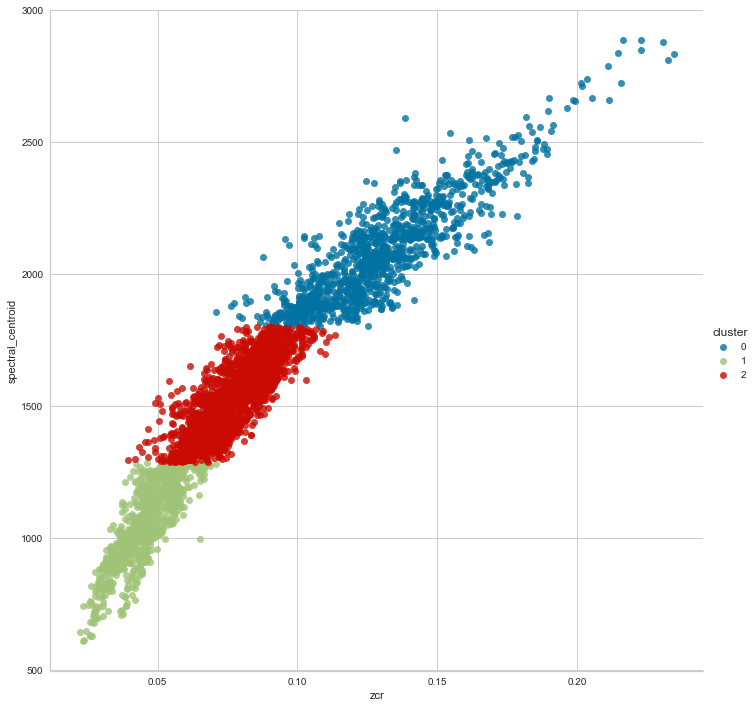

In [18]:
sns.lmplot(x='zcr', y='spectral_centroid',  height=10, data=df,
           fit_reg=False, hue='cluster')

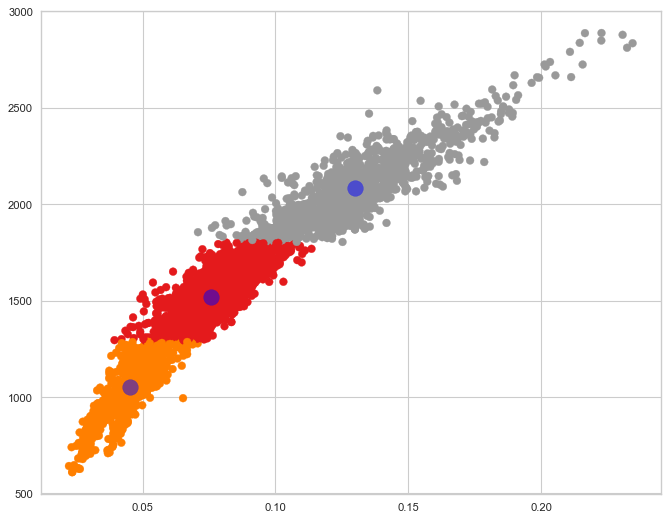

In [19]:
figure(figsize=(10, 8), dpi=80)
plt.scatter(df['zcr'], df['spectral_centroid'], c=y_kmeans, s=50, cmap='Set1_r')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5);

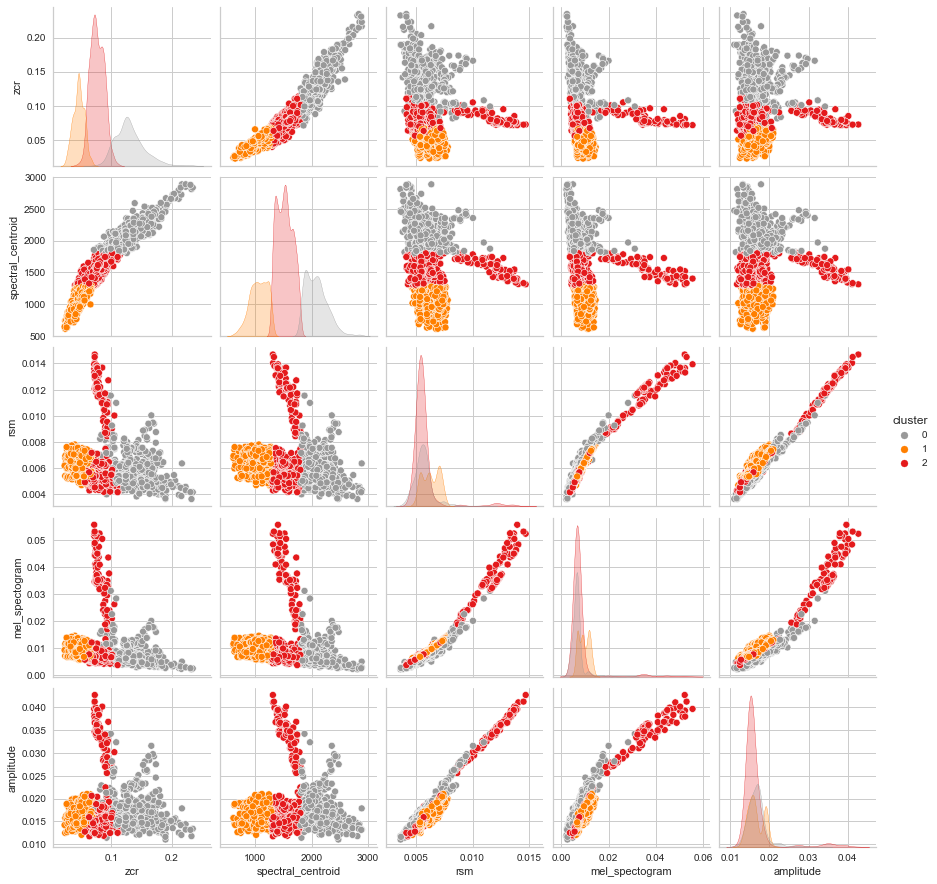

In [20]:
sns.pairplot(df, palette = 'Set1_r', hue='cluster');

In [21]:
def plot_cluster(k):
    
    fig = plt.figure()

    km = KMeans(n_clusters=k, init='k-means++', random_state=42)

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(df) # Fit the training data to the visualizer
    visualizer.poof() # Draw/show/poof the data
    
    



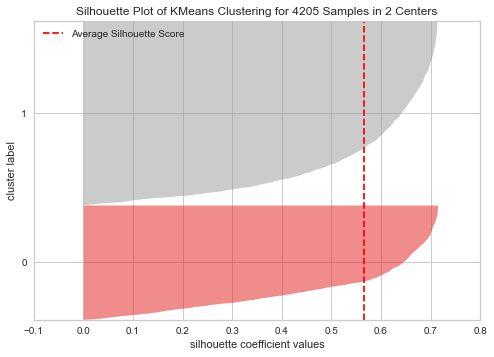

In [22]:
# Silhouette Plot in k =2
plot_cluster(2)

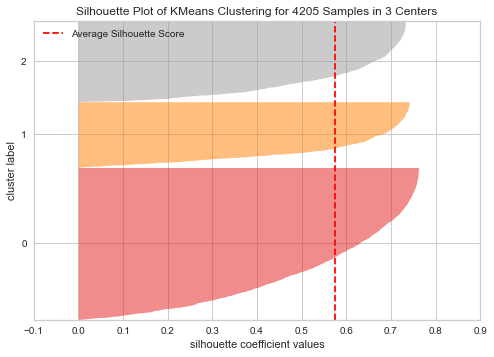

In [23]:
# Silhouette Plot in k = 3
plot_cluster(3)

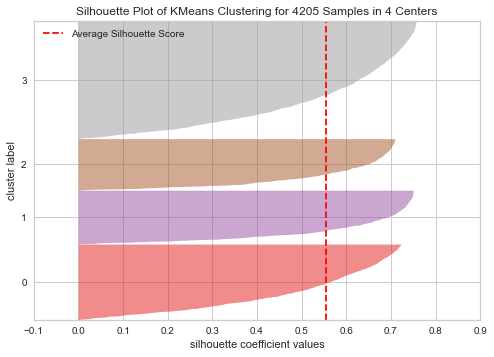

In [24]:
# Silhouette Plot in k =4

plot_cluster(4)

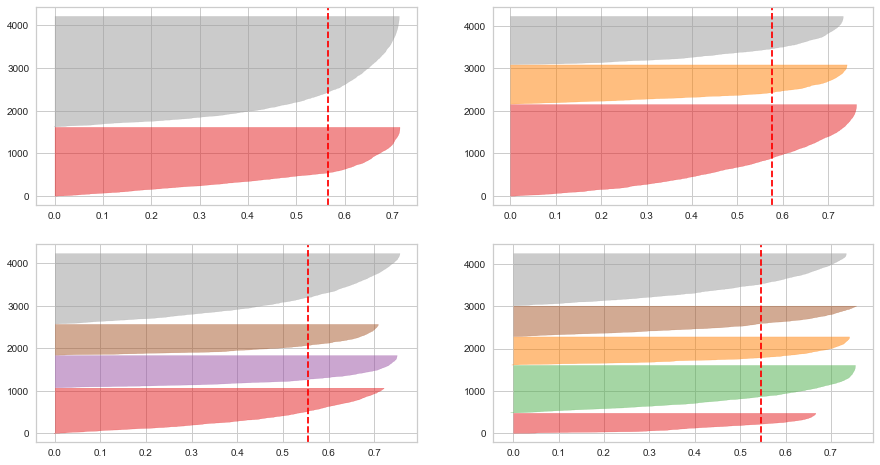

In [25]:

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, ax=ax[q-1][mod])
    visualizer.fit(df)
